In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("Fantasy Basketball Stats.csv")

Criteria for inclusion: At least 11 games played and 10 mpg

We must first create wft and wfg columns

In [3]:
data["ftm/g"] = data["ft%"] * data["fta/g"]
data["fgm/g"] = data["fg%"] * data["fga/g"]
data["ftm"] = data["ftm/g"] * data["g"]
data["fta"] = data["fta/g"] * data["g"]
data["fgm"] = data["fgm/g"] * data["g"]
data["fga"] = data["fga/g"] * data["g"]


In [4]:
league_avg_ftp = pd.Series.mean(data["ftm"])/pd.Series.mean(data["fta"])
league_avg_fgp = pd.Series.mean(data["fgm"])/pd.Series.mean(data["fga"])

In [5]:
data["wft"] = (data["ft%"]-league_avg_ftp)*data["fta/g"]
data["wfg"] = (data["fg%"]-league_avg_fgp)*data["fga/g"]

In [6]:
data["neg to/g"] = data["to/g"]*(-1)

In [7]:
import seaborn as sns

In [8]:
corr_data = data.loc[:,["p/g","a/g","3/g","r/g","s/g","b/g","wft","wfg","neg to/g"]]

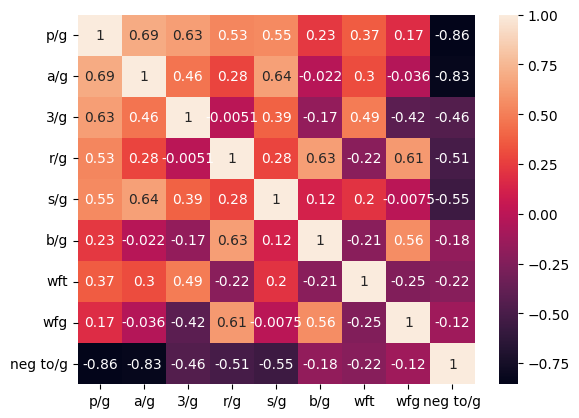

In [9]:
ax = sns.heatmap(corr_data.corr(), annot=True)

In [13]:
clean_data = data.loc[:,["Name","PuntV", "LeagV","g","m/g","p/g","a/g","3/g","r/g","s/g","b/g","wft","wfg","neg to/g"]]

In [23]:
#export clean data csv
clean_data.to_csv('Cleaned Stats.csv')